# GRU

In [1]:
import pandas as pd

#load the dataset
file_path='C:/Users/dugga/OneDrive/Desktop/ML1/ML/data/AAPL.csv'
data=pd.read_csv(file_path)

data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,12-12-1980,0.128348,0.128906,0.128348,0.128348,0.100323,469033600
1,15-12-1980,0.122210,0.122210,0.121652,0.121652,0.095089,175884800
2,16-12-1980,0.113281,0.113281,0.112723,0.112723,0.088110,105728000
3,17-12-1980,0.115513,0.116071,0.115513,0.115513,0.090291,86441600
4,18-12-1980,0.118862,0.119420,0.118862,0.118862,0.092908,73449600


In [5]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

close_prices= data['Close'].values

# Normalization
scaler= MinMaxScaler(feature_range=(0,1))
close_prices_scaled= scaler.fit_transform(close_prices.reshape(-1,1))
close_prices_scaled[:5]


array([[0.00043548],
       [0.00039868],
       [0.00034961],
       [0.00036495],
       [0.00038335]])

In [7]:
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Define the sequence length
seq_length = 60

# Create sequences
X, y = create_sequences(close_prices_scaled, seq_length)

# Split the data into training and testing sets
split_ratio= 0.8
split_index= int(len(X)*split_ratio)

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

In [9]:
from keras.models import Sequential
from keras.layers import GRU, Dense

model= Sequential()
model.add(GRU(units=50, return_sequences=True, input_shape=(seq_length,1)))
model.add(GRU(units=50))
model.add(Dense(units=1))

# Compile
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

C:\Users\dugga\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 60, 50)              │           7,950 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 50)                  │          15,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,301 (91.02 KB)

 Trainable params: 23,301 (91.02 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
history= model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)

Epoch 1/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - loss: 4.3866e-05 - val_loss: 6.2387e-06
Epoch 2/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 2.6261e-07 - val_loss: 5.9856e-06
Epoch 3/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 2.9035e-07 - val_loss: 5.9137e-06
Epoch 4/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 3.4744e-07 - val_loss: 6.1237e-06
Epoch 5/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 4.4800e-07 - val_loss: 6.7439e-06
Epoch 6/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - loss: 4.3309e-07 - val_loss: 5.5935e-06
Epoch 7/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 3.9487e-07 - val_loss: 4.7774e-06
Epoch 8/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 3.8882e-07 - val_loss: 7.3646e-06
Epoch 9/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 3.8301e-07 - val_loss: 4.9813e-06
Epoch 10/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 2.8817e-07 - val_loss: 1.0516e-05
Epoch 11/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms

65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 3.2195e-05
Test Loss: 0.00022646998695563525
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step


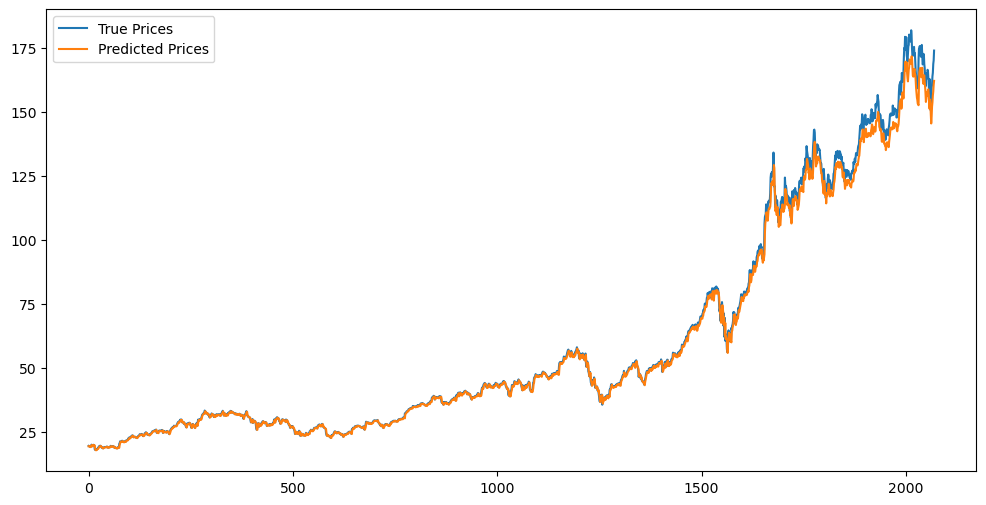

In [13]:
# Evaluate the model on the test set
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

# Make predictions
predictions = model.predict(X_test)

# Inverse transform the predictions and true values to get the original scale
predictions_inverse = scaler.inverse_transform(predictions)
y_test_inverse = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the predictions against the true values
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test_inverse, label='True Prices')
plt.plot(predictions_inverse, label='Predicted Prices')
plt.legend()
plt.show()

In [15]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test_inverse, predictions_inverse))
print(f'RMSE: {rmse}')

RMSE: 2.7383137213317648


In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error # Import mean_absolute_error

# Calculate MAE
mae = mean_absolute_error(y_test_inverse, predictions_inverse)
print(f'MAE: {mae}')

# Calculate MAPE
mape = np.mean(np.abs((y_test_inverse - predictions_inverse) / y_test_inverse)) * 100
print(f'MAPE: {mape}')

MAE: 1.482065464350515
MAPE: 1.7835959196830606
